In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/data.csv',encoding= 'unicode_escape')
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


# Data Preprocessing

In [ ]:
pd.set_option('display.max_colwidth', None)
data = df[['Sentence','Sentiment']]
data.columns = ["text", "label"]
data.head()

,text,label
0,"The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .",positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real possibility",negative
2,"For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .",positive
3,"According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .",neutral
4,"The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland .",neutral


In [ ]:
data['label']=data['label'].map({'neutral':0,'positive':0,'negative':1})

In [ ]:
data.head()

,text,label
0,"The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .",0
1,"$ESI on lows, down $1.50 to $2.50 BK a real possibility",1
2,"For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .",0
3,"According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .",0
4,"The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland .",0


In [ ]:
import gensim
data['text_clean_gensim'] = data['text'].apply(lambda x: gensim.utils.simple_preprocess(x,deacc=True))
data.head()

,text,label,text_clean_gensim
0,"The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .",0,"[the, geosolutions, technology, will, leverage, benefon, gps, solutions, by, providing, location, based, search, technology, communities, platform, location, relevant, multimedia, content, and, new, and, powerful, commercial, model]"
1,"$ESI on lows, down $1.50 to $2.50 BK a real possibility",1,"[esi, on, lows, down, to, bk, real, possibility]"
2,"For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .",0,"[for, the, last, quarter, of, componenta, net, sales, doubled, to, eur, from, eur, for, the, same, period, year, earlier, while, it, moved, to, zero, pre, tax, profit, from, pre, tax, loss, of, eur]"
3,"According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .",0,"[according, to, the, finnish, russian, chamber, of, commerce, all, the, major, construction, companies, of, finland, are, operating, in, russia]"
4,"The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland .",0,"[the, swedish, buyout, firm, has, sold, its, remaining, percent, stake, almost, eighteen, months, after, taking, the, company, public, in, finland]"


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (data['text_clean_gensim'], data['label'] , test_size=0.2,random_state=45)

# Traning Word to Vector

In [ ]:
X_test=X_test.reset_index(drop=True)
X_test.head()

0                                                                       [the, first, of, the, two, project, phases, is, expected, to, be, completed, by, the, end, of]
1                                                                       [the, stock, rose, for, third, day, on, tuesday, bringing, its, three, day, rise, to, gbx, or]
2                                                                                [louiebeene, vwap, is, held, the, trend, line, should, be, on, lot, of, radars, navb]
3    [operating, profit, in, the, fourth, quarter, went, down, to, eur, from, eur, for, the, corresponding, period, of, as, it, included, costs, of, growth, projects]
4                                                                         [the, fair, value, of, the, investment, properties, totaled, eur, mn, up, from, eur, mn, in]
Name: text_clean_gensim, dtype: object

In [ ]:
w2v_model = gensim.models.Word2Vec(X_train, min_count=1)

In [ ]:
words = w2v_model.wv.index2word

In [ ]:
X_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in X_train])
X_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in X_test])

<ipython-input-12-5540b7745640>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in X_train])
<ipython-input-12-5540b7745640>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in X_test])


In [ ]:
X_train_vect_avg = []
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(100, dtype=float))
        
X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype=float))

#Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train_vect_avg,y_train)

GaussianNB()

In [ ]:
from sklearn import metrics
y_pred = classifier.predict(X_train_vect_avg) 
metrics.accuracy_score(y_pred, y_train)
print('Accuracy Score:\n',metrics.accuracy_score(y_train,y_pred))
print('                                                       ')
print('Confusion Matrix:\n',metrics.confusion_matrix(y_train,y_pred))
print('                                                       ')
print('Precision Score:\n',metrics.precision_score(y_train,y_pred))
print('                                                       ')
print('recall score:\n',metrics.recall_score(y_train,y_pred))

Accuracy Score:
 0.7331478707468436
                                                       
Confusion Matrix:
 [[3155  832]
 [ 415  271]]
                                                       
Precision Score:
 0.2456935630099728
                                                       
recall score:
 0.39504373177842567


In [ ]:
from sklearn import metrics
y_pred = classifier.predict(X_test_vect_avg) 
metrics.accuracy_score(y_pred, y_test)
print('Accuracy Score:\n',metrics.accuracy_score(y_test, y_pred))
print('                                                       ')
print('Confusion Matrix:\n',metrics.confusion_matrix(y_test, y_pred))
print('                                                       ')
print('Precision Score:\n',metrics.precision_score(y_test,y_pred))
print('                                                       ')
print('recall score:\n',metrics.recall_score(y_test, y_pred))

Accuracy Score:
 0.7502138579982891
                                                       
Confusion Matrix:
 [[804 191]
 [101  73]]
                                                       
Precision Score:
 0.2765151515151515
                                                       
recall score:
 0.41954022988505746


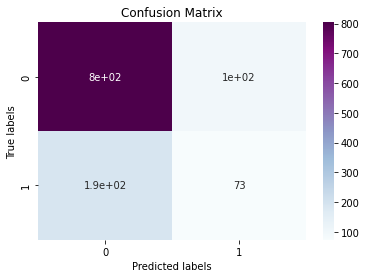

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_conf(y_pred,y_test):
    cf_matrix = metrics.confusion_matrix( y_pred,y_test)
    ax= plt.subplot()
    sns.heatmap(cf_matrix,annot=True,ax=ax, cmap="BuPu")
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    
plot_conf(y_pred,y_test) 